# Fundamentos de Redes Neuronales

## ¿Qué son?

Son operaciones matemáticas basadas en las neuronas de los seres humanos, en donde cada neurona procesa la información que es entregada como input, lo procesa y comparte su información output

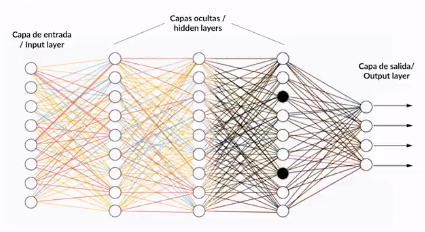

Generalmente se tienen tres tipos de capas:

- Input layer
- Hidden layers (procesamiento)
- Output layer (predicción)

Las últimas capas ocultas son las que tienden al overfitting

Su opreatividad realmente es un producto punto de sus neuronas y pesos sumados a sus pesos, es importante recordar que para esto las matrices deben ser de tipo:

$(m,n)*(n,m)$

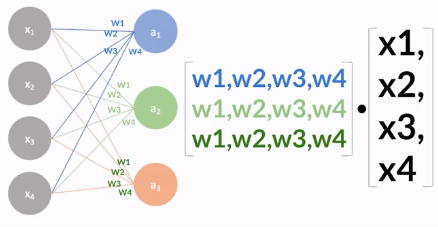

## Herramientas

- TensorFlow
- PyTorch
- Keras (API para facilitar el consumo de un backend)
- Theano
- Microsoft Cognitive Toolkit
- Torch

## Deep Learning

Se llama aprendizaje profundo debido a las capas de complejidad que poseen las redes, hace parte de la rama de Machine Learning

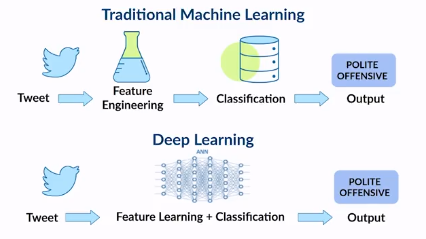

Tiene la problematica del overfitting (no generalizar la información), también que no se sabe que es lo que hay dentro de las capas, por lo que es dificil seguir uun proceso


## [¿Cómo funciona?](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.03050&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

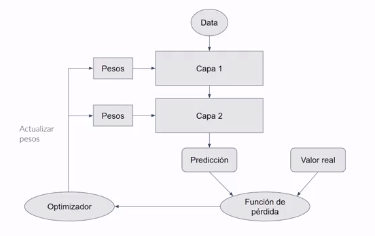

### Neurona

También conocido como perceptrón, realmente una neurona es una función lineal de todos los datos que se ingresan en ella en conjunto con unos pesos para cada parametro de la función, estos pesos los ajusta la red en base a cual es mejor para la búsqueda del output que tiene ese input concreto

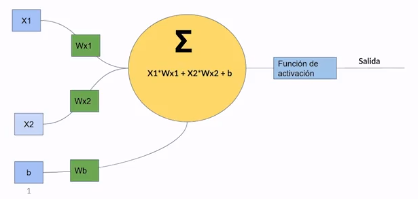

En este caso la $b$ es un cesgo, error o bias que tienen las neuronas. Cada neurona tiene una función de activación que cambia por completo la salida que se obtiene en base a unas reglas

### Funciones de activación

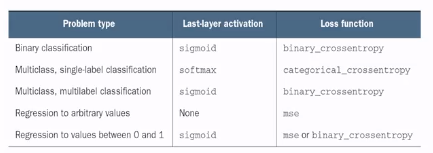

Son funciones que deforman las salidas lineales y las convierten a otro valor dependiente a la función

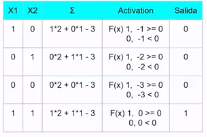

Estas funciones pueden ser discretas (con valores definidos como 0 y 1) o pueden ser continuas, por ejemplo la anterior es discreta

#### Discretas

##### Threshold

Consiste en una compuerta lógica, cuando la función es menor de 0, retornará un 0, en caso contrario retornará un 1, o matematicamente:

$y=\begin{cases}
1 & \text{si } z \ge 0 \\
0 & \text{si } z < 0
\end{cases}$

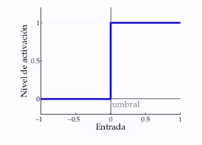

Esta es buena para problemas con solo dos valores posibles

##### Signo / Signum

Similar al threshold pero incluye valores negativos

$y=\begin{cases}
1 & \text{si } z \ge 0 \\
-1 & \text{si } z < 0
\end{cases}$

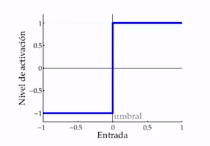

#### Continuas

##### Sigmoid

Es una función muy util para problemas estadisticos en donde la salida es una probabilidad, tiene el inconveniente que si hay muchos valores pequeños, todos van a tender a ser 0

$y=\frac{1}{1+e^{-z}}$

En ocasiones tambíen se usa su derivada:

$\frac{d}{dx}\left(\frac{1}{1+e^{-x}}\right)=\frac{e^{-x}}{(e^{-x}+1)^2}$

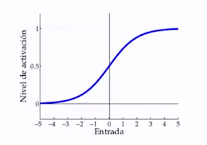

##### Tanh

Similar a la sigmoide pero incluyendo valores negativas

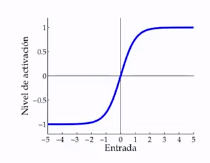

##### ReLU

Si el valor es menor que 0, retorna 0, si no lo es, retorna el propio valor, es la más usada al momento de usar capas ocultas ya que converge muy rapido en los algoritmos

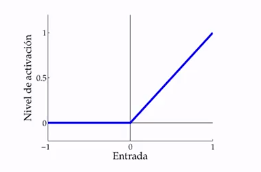

##### SoftMax

Retorna la probabilidad de clasificación de varios valores, es muy usada para las neuronas de salida

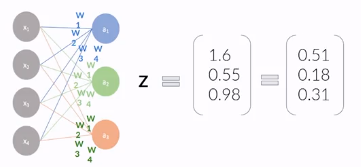

$y_j=\frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}$

### Función de pérdida

Dado a que nuestra red busca predecir un valor o una clasificación se necesita una función de pérdida para conocer que tan buena es la predicción con respecto al valor real

#### MSE Mean squared error

Es muy usado en modelos de regresión lineales, toma la distancia entre el valor real y el valor que predice el modelo, es util para predecir valores

$MSE =  \frac{1}{n}\sum{(y-\hat{y})}$

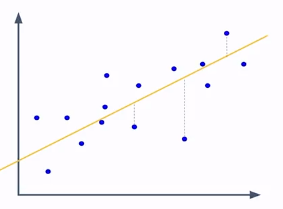

#### Cross Entropy

Se usa para evaluar predicciones categoricas, ya que mide la probabilidad de las clases

$-\sum_{x}^{}p(x)\log{q(x)}$

### [Descenso del gradiente](http://www.benfrederickson.com/numerical-optimization/) (Optimizador)

Cuando se está optimizando las predicciones, se busca que la pendiente de la función sea nula, negativa o cercana a cero, esto se hace derivando la función de pérdida

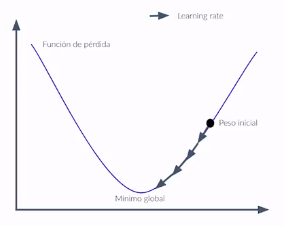  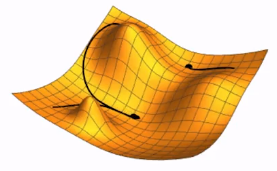

El learning rate es la distancia que dan los pasos para encontrar el mínimo global, la idea es buscar un valor que no sean ni muy grande ni pequeño para que se pueda hallar el minimo de forma eficiente y precisa

A veces el optimizador se puede quedar estancado en un mínimo local, por lo que se aplica el momentum para encontar el global

El optimizador es el como se buscan los pesos con respecto a la función de perdida

### Backpropagation

Cuando un función de pérdida encuentra un error, se desea encontrar qué capas o qué neuronas fueron las culpables de este error, para eso es el algoritmo backpropagation, el cual usa aprendizaje inverso y derivadas parciales, para que al actualizar los pesos se cambien es mayor medida los que más error generen.

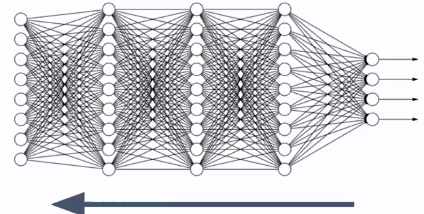

## Mi primera red neuronal (Keras - MNIST)

Se va a usar mnist como dataset, que es un conjunto de imagenes de los numeros del 0 al 9 escritos a mano

In [91]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [92]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

Es importante observar las caracteristicas de la información que se tiene, como es la forma (shape) o incluso observar alguna de las imagenes del dataset

In [93]:
train_data.shape # 60000 ejemplos de imagenes 28x28 (Numeros de 0 a 255)

(60000, 28, 28)

In [94]:
test_data.shape

(10000, 28, 28)

5


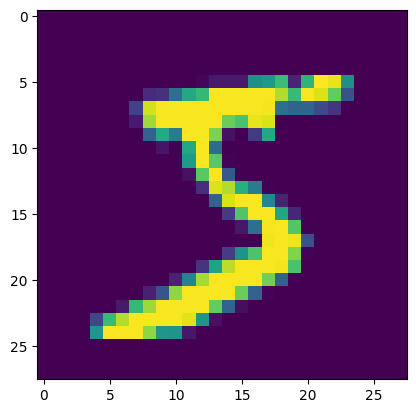

In [95]:
print(train_labels[0])
plt.imshow(train_data[0])

Se crea un modelo secuencial, el cual permite ingresar multiples capas, en un principio se ingresaron solo dos, una para la entrada con activación relu y otra para la salida con activación softmax

In [96]:
model = models.Sequential() # Crear un modelo que acepte varias capas

model.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10, activation="softmax"))

In [97]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics="accuracy")

In [98]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dense_38 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Se organizan los datos para tenerlos de una mejor manera para la red neuronal, en este caso se cambia el shape

In [99]:
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype("float32")/255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype("float32")/255

x_train.shape

(60000, 784)

Se deben transformar los labels ($y$), para llevarlos a un vector con valores binarios, más entendible para las redes, en donde se posiciona el 1 en donde se encuentra el dato

In [100]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Entrenar los datos

In [101]:
model.fit(x_train, y_train, 
          epochs=5, # Iteraciones que va a hacer el modelo
          batch_size=128 # Los lotes de datos que usará
          )

Epoch 1/5
120/469 [======>.......................] - ETA: 3s - loss: 0.4737 - accuracy: 0.8643

469/469 [==============================] - 5s 8ms/step - loss: 0.2660 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1079 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0711 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0509 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0375 - accuracy: 0.9889


Se evalúa el modelo para conocer con qué valor quedó la metrica

In [102]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9776


[0.06973821669816971, 0.9775999784469604]

In [103]:
x_test[1].shape

(784,)

1/1 [==============================] - 0s 244ms/step


Predicción: 8
Real: 8


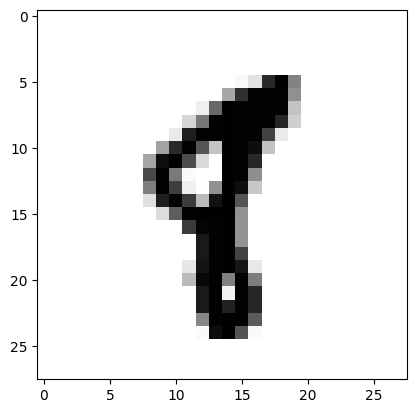

In [104]:
index = np.random.randint(0, len(x_test))

plt.imshow(x_test[index].reshape(28,28), cmap="binary")

print(f"Predicción: {+np.argmax(model.predict(x_test[index].reshape(1, 784)))}")
print(f"Real: {np.argmax(y_test[index])}")

In [105]:
import cv2

1/1 [==============================] - 0s 180ms/step
Predicción: 3
Real: 


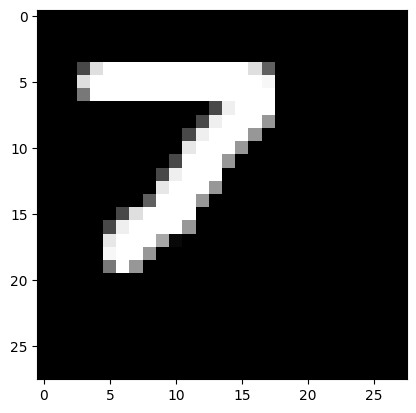

In [106]:
plt.imshow(cv2.imread('./data/NumberTest.png', cv2.IMREAD_GRAYSCALE).reshape(28,28), cmap="binary")

print(f"Predicción: {+np.argmax(model.predict(cv2.imread('./data/NumberTest.png', cv2.IMREAD_GRAYSCALE).reshape(1, 784)))}")
print(f"Real: ")

En este caso usamos una división de solo train y test, pero como buena practica se toma otra parte de los datos para la validación, esto con el fin de cambiar hiperparametros de la red

## Clasificación binaria

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [2]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
word_index = dict([(value,key) for (key,value) in word_index.items()])
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
for _ in train_data[0]:
    print(word_index.get(_ -3), _)

None 1
this 14
film 22
was 16
just 43
brilliant 530
casting 973
location 1622
scenery 1385
story 65
direction 458
everyone's 4468
really 66
suited 3941
the 4
part 173
they 36
played 256
and 5
you 25
could 100
just 43
imagine 838
being 112
there 50
robert 670
None 2
is 9
an 35
amazing 480
actor 284
and 5
now 150
the 4
same 172
being 112
director 167
None 2
father 336
came 385
from 39
the 4
same 172
scottish 4536
island 1111
as 17
myself 546
so 38
i 13
loved 447
the 4
fact 192
there 50
was 16
a 6
real 147
connection 2025
with 19
this 14
film 22
the 4
witty 1920
remarks 4613
throughout 469
the 4
film 22
were 71
great 87
it 12
was 16
just 43
brilliant 530
so 38
much 76
that 15
i 13
bought 1247
the 4
film 22
as 17
soon 515
as 17
it 12
was 16
released 626
for 18
None 2
and 5
would 62
recommend 386
it 12
to 8
everyone 316
to 8
watch 106
and 5
the 4
fly 2223
fishing 5244
was 16
amazing 480
really 66
cried 3785
at 33
the 4
end 130
it 12
was 16
so 38
sad 619
and 5
you 25
know 124
what 51
they 36

Vectorizar las palabras

In [9]:
def vectorize(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [10]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
x_train.shape

(25000, 10000)

In [13]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
y_train[0]

1.0

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [17]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

In [18]:
hist = model.fit(partial_x_train, partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 74ms/step - loss: 0.5355 - acc: 0.7755 - val_loss: 0.4075 - val_acc: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3273 - acc: 0.8924 - val_loss: 0.3296 - val_acc: 0.8709
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2461 - acc: 0.9190 - val_loss: 0.3294 - val_acc: 0.8623
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2003 - acc: 0.9334 - val_loss: 0.2743 - val_acc: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1678 - acc: 0.9441 - val_loss: 0.3001 - val_acc: 0.8819
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1418 - acc: 0.9548 - val_loss: 0.3161 - val_acc: 0.8755
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1214 - acc: 0.9622 - val_loss: 0.2952 - val_acc: 0.8859
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1033 - a

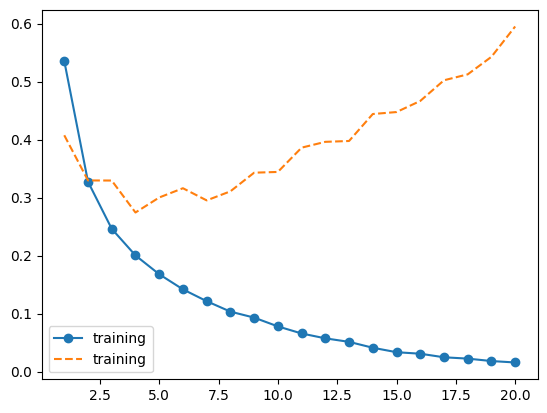

In [19]:
import matplotlib.pyplot as plt

history_dict = hist.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "o-", label = "training")
plt.plot(epochs, val_loss_values, "--", label = "training")
plt.legend()
plt.show()

La idea es que las gráficas sean similares, para evitar el overfitting o el underfitting, en nuestro caso la función de pérdida es muy grande

In [20]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6289 - acc: 0.8561


[0.6288813352584839, 0.8561199903488159]

### ¿Cómo evitar el overfitting?

Este es muy común, ya que los datos tienden a especificar su propia información, una de sus soluciones es hacer la red más pequeña, pero esto podría provocar underfitting

Para ello se debe regularizar, reducir la complejidad del modelo reduciendo los pesos del modelo

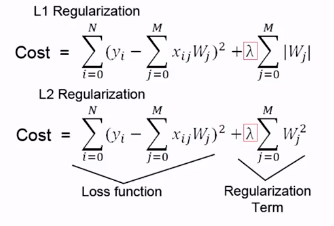

Otra técnica es el Dropout, el cual apaga un porcentaje de las neuronas de la red para evitar el overfitting

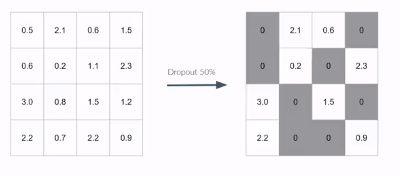

#### Modelo menos complejo

In [21]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation="relu", input_shape=(10000,)))
model2.add(layers.Dense(4, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

hist2 = model2.fit(partial_x_train, partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.6632 - acc: 0.6005 - val_loss: 0.6236 - val_acc: 0.7008
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5850 - acc: 0.8001 - val_loss: 0.5506 - val_acc: 0.8107
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5053 - acc: 0.8627 - val_loss: 0.4812 - val_acc: 0.8616
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4311 - acc: 0.8872 - val_loss: 0.4212 - val_acc: 0.8662
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3692 - acc: 0.8994 - val_loss: 0.3750 - val_acc: 0.8758
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3194 - acc: 0.9075 - val_loss: 0.3423 - val_acc: 0.8785
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2797 - acc: 0.9157 - val_loss: 0.3158 - val_acc: 0.8831
Epoch 8/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2481 - a

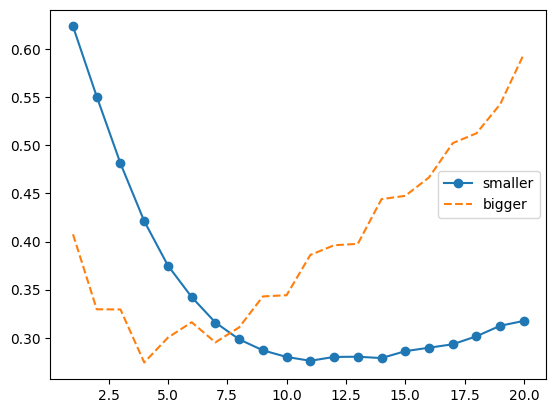

In [22]:
import matplotlib.pyplot as plt

val_loss_values2 = hist2.history["val_loss"]

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, val_loss_values2, "o-", label = "smaller")
plt.plot(epochs, val_loss_values, "--", label = "bigger")
plt.legend()
plt.show()

In [23]:
model2.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3396 - acc: 0.8741


[0.33958110213279724, 0.8741199970245361]

En esta imagen se aprecia que el modelo más pequeño tarda más en hacer overfitting, mientras que el más grande lo hace de forma más rápida y más escalonada 

#### Regularización

In [24]:
from keras import regularizers

In [25]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation="relu", input_shape=(10000,), 
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation="relu", 
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation="sigmoid"))

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

hist3 = model3.fit(partial_x_train, partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 68ms/step - loss: 0.5868 - acc: 0.7588 - val_loss: 0.4649 - val_acc: 0.8518
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3867 - acc: 0.8920 - val_loss: 0.3873 - val_acc: 0.8718
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3117 - acc: 0.9159 - val_loss: 0.3493 - val_acc: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2684 - acc: 0.9270 - val_loss: 0.3374 - val_acc: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2411 - acc: 0.9394 - val_loss: 0.3610 - val_acc: 0.8762
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2275 - acc: 0.9438 - val_loss: 0.3356 - val_acc: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2109 - acc: 0.9507 - val_loss: 0.3402 - val_acc: 0.8818
Epoch 8/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2048 - a

In [26]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation="relu", input_shape=(10000,), 
                        kernel_regularizer=regularizers.l1(0.001)))
model4.add(layers.Dense(16, activation="relu", 
                        kernel_regularizer=regularizers.l1(0.001)))
model4.add(layers.Dense(1, activation="sigmoid"))

model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

hist4 = model4.fit(partial_x_train, partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 69ms/step - loss: 1.1466 - acc: 0.7283 - val_loss: 0.7160 - val_acc: 0.8256
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6694 - acc: 0.8362 - val_loss: 0.6390 - val_acc: 0.8536
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6159 - acc: 0.8536 - val_loss: 0.6626 - val_acc: 0.8076
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5846 - acc: 0.8608 - val_loss: 0.6143 - val_acc: 0.8391
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5671 - acc: 0.8627 - val_loss: 0.6331 - val_acc: 0.8253
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5513 - acc: 0.8686 - val_loss: 0.5604 - val_acc: 0.8644
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5396 - acc: 0.8709 - val_loss: 0.5819 - val_acc: 0.8459
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5321 - a

In [27]:
model5 = models.Sequential()
model5.add(layers.Dense(16, activation="relu", input_shape=(10000,), 
                        kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model5.add(layers.Dense(16, activation="relu", 
                        kernel_regularizer=regularizers.l1_l2(0.001,0.001)))
model5.add(layers.Dense(1, activation="sigmoid"))

model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

hist5 = model5.fit(partial_x_train, partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 70ms/step - loss: 1.1724 - acc: 0.7389 - val_loss: 0.7701 - val_acc: 0.7851
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.7287 - acc: 0.8184 - val_loss: 0.7143 - val_acc: 0.8034
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.6702 - acc: 0.8405 - val_loss: 0.6712 - val_acc: 0.8228
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6303 - acc: 0.8461 - val_loss: 0.6278 - val_acc: 0.8467
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5986 - acc: 0.8551 - val_loss: 0.6042 - val_acc: 0.8516
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5783 - acc: 0.8595 - val_loss: 0.6426 - val_acc: 0.8115
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5672 - acc: 0.8603 - val_loss: 0.5737 - val_acc: 0.8572
Epoch 8/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5506 - a

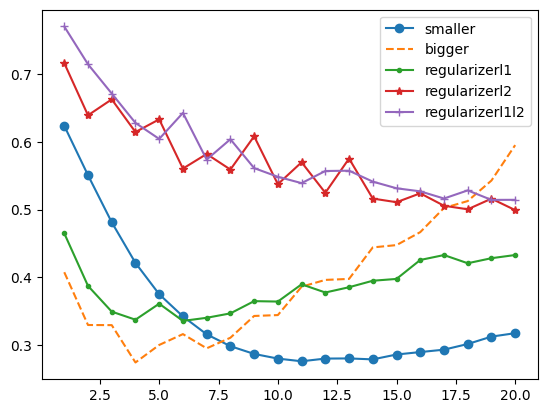

In [28]:
val_loss_values3 = hist3.history["val_loss"]
val_loss_values4 = hist4.history["val_loss"]
val_loss_values5 = hist5.history["val_loss"]

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, val_loss_values2, "o-", label = "smaller")
plt.plot(epochs, val_loss_values, "--", label = "bigger")
plt.plot(epochs, val_loss_values3, ".-", label = "regularizerl1")
plt.plot(epochs, val_loss_values4, "*-", label = "regularizerl2")
plt.plot(epochs, val_loss_values5, "+-", label = "regularizerl1l2")
plt.legend()
plt.show()

#### Dropout

In [29]:
model6 = models.Sequential()
model6.add(layers.Dense(4, activation="relu", input_shape=(10000,)))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(4, activation="relu"))
model6.add(layers.Dropout(0.5))
model6.add(layers.Dense(1, activation="sigmoid"))

model6.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

hist6 = model6.fit(partial_x_train, partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 102ms/step - loss: 0.6889 - acc: 0.5129 - val_loss: 0.6831 - val_acc: 0.5494
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6770 - acc: 0.5525 - val_loss: 0.6688 - val_acc: 0.7337
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6602 - acc: 0.5833 - val_loss: 0.6418 - val_acc: 0.7854
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6380 - acc: 0.5860 - val_loss: 0.6018 - val_acc: 0.8485
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6135 - acc: 0.5880 - val_loss: 0.5580 - val_acc: 0.8622
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5914 - acc: 0.5879 - val_loss: 0.5292 - val_acc: 0.8719
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5693 - acc: 0.6003 - val_loss: 0.5011 - val_acc: 0.8765
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5501 - 

In [30]:
model7 = models.Sequential()
model7.add(layers.Dense(4, activation="relu", input_shape=(10000,)))
model7.add(layers.Dropout(0.25))
model7.add(layers.Dense(4, activation="relu"))
model7.add(layers.Dropout(0.25))
model7.add(layers.Dense(1, activation="sigmoid"))

model7.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

hist7 = model7.fit(partial_x_train, partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 71ms/step - loss: 0.6577 - acc: 0.5965 - val_loss: 0.6117 - val_acc: 0.7966
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5976 - acc: 0.7096 - val_loss: 0.5597 - val_acc: 0.8100
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5598 - acc: 0.7505 - val_loss: 0.5317 - val_acc: 0.8031
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5349 - acc: 0.7756 - val_loss: 0.5076 - val_acc: 0.8701
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5116 - acc: 0.7927 - val_loss: 0.4830 - val_acc: 0.8608
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4900 - acc: 0.8076 - val_loss: 0.4671 - val_acc: 0.8459
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4720 - acc: 0.8153 - val_loss: 0.4473 - val_acc: 0.8822
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4585 - a

In [31]:
model8 = models.Sequential()
model8.add(layers.Dense(5, activation="relu", input_shape=(10000,)))
model8.add(layers.Dropout(0.1))
model8.add(layers.Dense(5, activation="relu"))
model8.add(layers.Dropout(0.1))
model8.add(layers.Dense(1, activation="sigmoid"))

model8.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

hist8 = model8.fit(partial_x_train, partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 73ms/step - loss: 0.6037 - acc: 0.7101 - val_loss: 0.5053 - val_acc: 0.8463
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4789 - acc: 0.8123 - val_loss: 0.4160 - val_acc: 0.8690
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4014 - acc: 0.8485 - val_loss: 0.3627 - val_acc: 0.8819
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3457 - acc: 0.8727 - val_loss: 0.3382 - val_acc: 0.8757
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3056 - acc: 0.8903 - val_loss: 0.3071 - val_acc: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2726 - acc: 0.9015 - val_loss: 0.2889 - val_acc: 0.8905
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2482 - acc: 0.9115 - val_loss: 0.2805 - val_acc: 0.8907
Epoch 8/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2205 - a

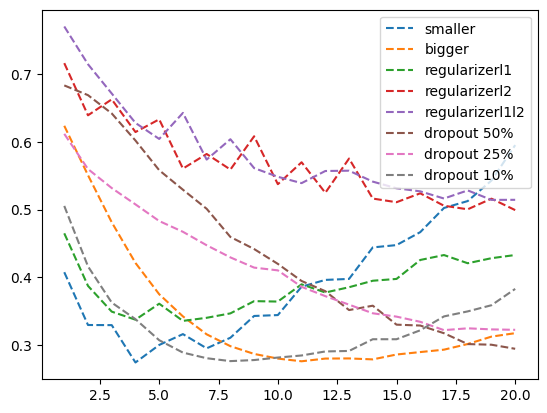

In [32]:
val_loss_values6 = hist6.history["val_loss"]
val_loss_values7 = hist7.history["val_loss"]
val_loss_values8 = hist8.history["val_loss"]

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, val_loss_values, "--", label = "smaller")
plt.plot(epochs, val_loss_values2, "--", label = "bigger")
plt.plot(epochs, val_loss_values3, "--", label = "regularizerl1")
plt.plot(epochs, val_loss_values4, "--", label = "regularizerl2")
plt.plot(epochs, val_loss_values5, "--", label = "regularizerl1l2")
plt.plot(epochs, val_loss_values6, "--", label = "dropout 50%")
plt.plot(epochs, val_loss_values7, "--", label = "dropout 25%")
plt.plot(epochs, val_loss_values8, "--", label = "dropout 10%")
plt.legend()
plt.show()

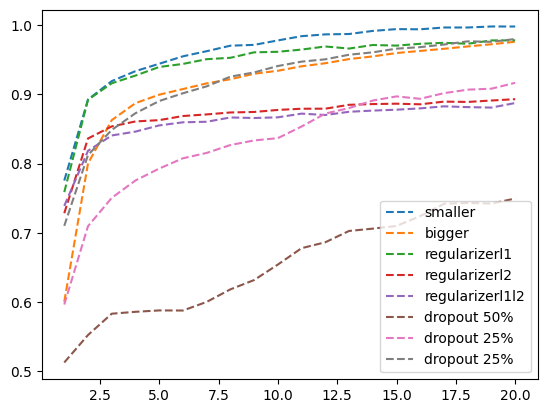

In [33]:
plt.plot(epochs, hist.history["acc"] , "--", label = "smaller")
plt.plot(epochs, hist2.history["acc"], "--", label = "bigger")
plt.plot(epochs, hist3.history["acc"], "--", label = "regularizerl1")
plt.plot(epochs, hist4.history["acc"], "--", label = "regularizerl2")
plt.plot(epochs, hist5.history["acc"], "--", label = "regularizerl1l2")
plt.plot(epochs, hist6.history["acc"], "--", label = "dropout 50%")
plt.plot(epochs, hist7.history["acc"], "--", label = "dropout 25%")
plt.plot(epochs, hist8.history["acc"], "--", label = "dropout 25%")
plt.legend()
plt.show()

## Clasificación múltiple

In [34]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [35]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data[0]

2110848/2110848 [==============================] - 1s 0us/step


[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [36]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])

for _ in train_data[0]:
    print(word_index.get(_ -3))

550378/550378 [==============================] - 0s 1us/step
None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [37]:
train_data.shape

(8982,)

In [44]:
train_labels.min(),train_labels.max()

(0, 45)

In [38]:
def vectorize(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [39]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [41]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [67]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [74]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape = (10000,),
                       kernel_regularizer=regularizers.L1()))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation="relu"),kernel_regularizer=regularizers.L1())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(46, activation="softmax"))

In [75]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [76]:
hist = model.fit(partial_x_train, partial_y_train,
                 epochs=30,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Epoch 1/30
16/16 [==============================] - 2s 69ms/step - loss: 3.0227 - accuracy: 0.4559 - val_loss: 2.2694 - val_accuracy: 0.5920
Epoch 2/30
16/16 [==============================] - 0s 29ms/step - loss: 1.9871 - accuracy: 0.6089 - val_loss: 1.6957 - val_accuracy: 0.6380
Epoch 3/30
16/16 [==============================] - 0s 31ms/step - loss: 1.5694 - accuracy: 0.6650 - val_loss: 1.4526 - val_accuracy: 0.6830
Epoch 4/30
16/16 [==============================] - 0s 29ms/step - loss: 1.3564 - accuracy: 0.6978 - val_loss: 1.3198 - val_accuracy: 0.7060
Epoch 5/30
16/16 [==============================] - 0s 28ms/step - loss: 1.1994 - accuracy: 0.7245 - val_loss: 1.2301 - val_accuracy: 0.7210
Epoch 6/30
16/16 [==============================] - 0s 31ms/step - loss: 1.0821 - accuracy: 0.7471 - val_loss: 1.1550 - val_accuracy: 0.7400
Epoch 7/30
16/16 [==============================] - 0s 29ms/step - loss: 0.9866 - accuracy: 0.7689 - val_loss: 1.1062 - val_accuracy: 0.7530
Epoch 8/30
16

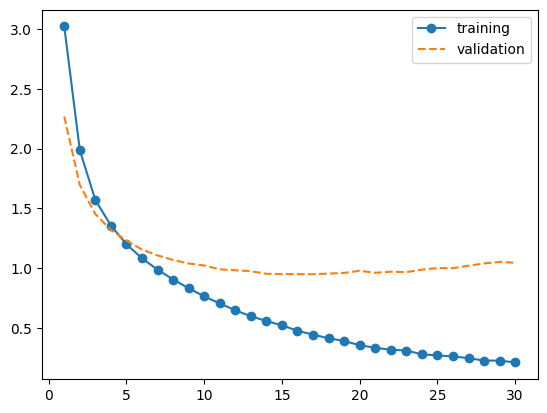

In [77]:
epochs = range(1, len(hist.history["loss"])+1)

plt.plot(epochs, hist.history["loss"], "o-", label = "training")
plt.plot(epochs, hist.history["val_loss"], "--", label = "validation")
plt.legend()
plt.show()

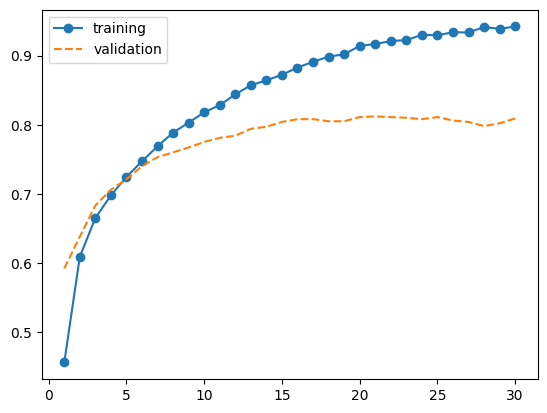

In [78]:
plt.plot(epochs, hist.history["accuracy"], "o-", label = "training")
plt.plot(epochs, hist.history["val_accuracy"], "--", label = "validation")
plt.legend()
plt.show()

In [79]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1186 - accuracy: 0.7854


[1.1186162233352661, 0.7853962779045105]

In [80]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [81]:
word_index[np.argmax(predictions[0])]

'to'

## Problema de regresión

### K-fold validation

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import boston_housing
from keras import models, layers, optimizers

In [30]:
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

In [31]:
train_data.shape

(404, 13)

In [32]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

Se recomienda normalizar para llevar los datos de 0 a 1 para que la red de igual importancia a todos los valores

In [33]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data / std


test_data = test_data - mean
test_data = test_data / std

In [34]:
def buildModel(lr_var, input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, "relu", input_shape=(input_data,)))
    model.add(layers.Dense(64, "relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizers.RMSprop(learning_rate=lr_var),
                loss="mse",
                metrics=["mae"]) # Se usa el mean absolute error
    return model

In [57]:
k = 4
num_val_samples = len(train_data) // k
num_epoch = 70
all_history = []

In [58]:
for i in range(k):
    print("Fold " , i)
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0   
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0   
    )    
    model = buildModel(0.001,13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])
    

Fold  0


Fold  1
Fold  2
Fold  3


In [59]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0) # Promedio de cada una de las iteraciones
all_mae_avg

0     19.359222
1     15.826438
2     11.598617
3      7.770672
4      5.640276
        ...    
65     2.355597
66     2.445581
67     2.414597
68     2.391034
69     2.359629
Length: 70, dtype: float64

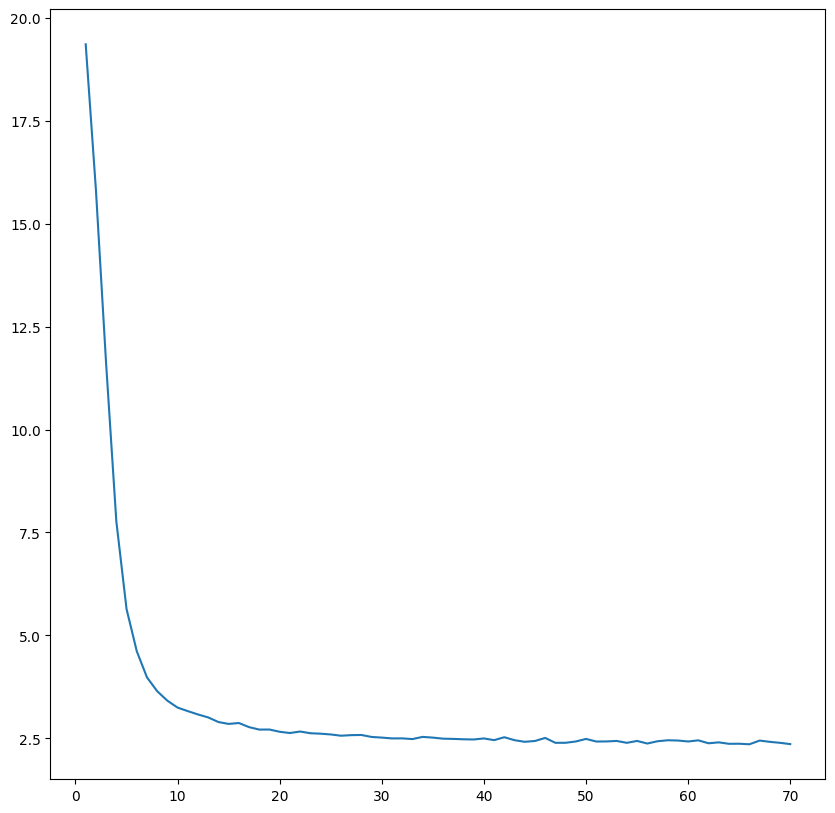

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg)+1), all_mae_avg)
plt.show()

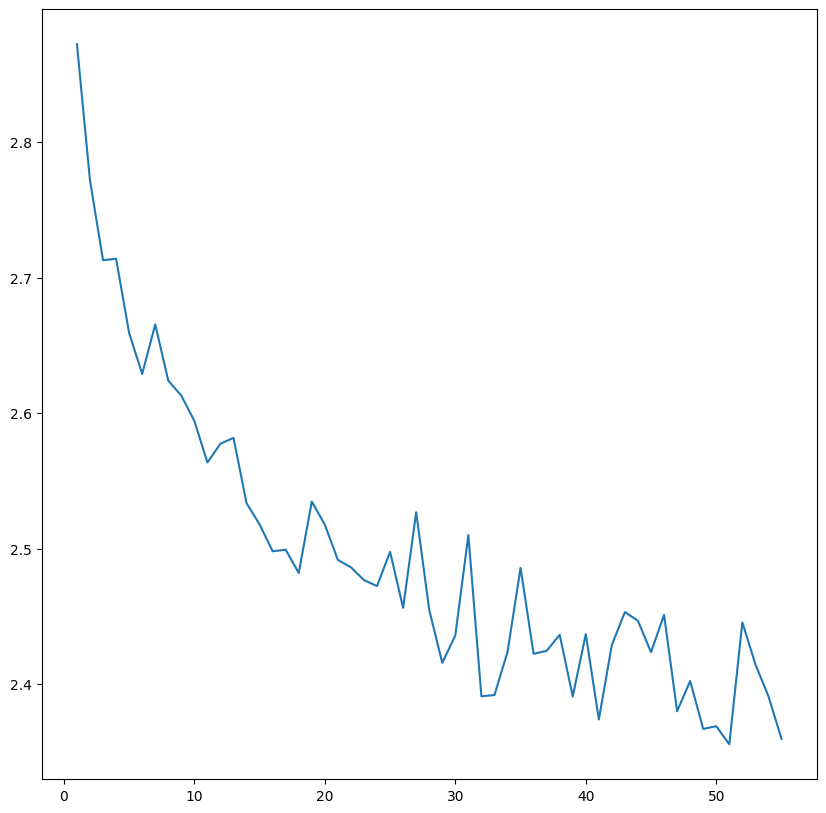

In [61]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [62]:
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 19.7807 - mae: 2.8443


[19.78070831298828, 2.8442795276641846]